# Tweeting The Storm
> #### An analysis of the 2015 UK and Ireland storm using social media data

### Overview

The aim of this project is to explore distributions of data, and to interpret patterns in these distributions. It includes exploration of temporal and spatial distributions of discrete events using histograms and maps. Exploration of a joint distribution of multiple attributes is also carried out using projection and partition based clustering.

### Data

The data is derived from geolocated Tweets from UK and Ireland from 27th March - 2nd April 2015. They relate to a storm that occured in this period.

The data was pre-processed by creating a separate list of words (storm, wind, rain, snow, hail, flood, road, collapse, injury, disrupt, and forecast) and their synonyms. Binary attributes were created to show prescence of each of these words.

Feature engineering was carried out based on 11 attributes to derive new attributes; 'bad weather(sum)', ‘bad weather’, ‘consequence (sum)’, ‘consequence’.

### Methods

First of all, let's import thr neccesary modules required for analysis.

In [6]:
import os #assign correct directory
import pandas as pd #for analyis
import numpy as np #for numeric operations
from sklearn.cluster import KMeans #for kmeans algorithm
os.chdir(r'/Users/roryhurley/Desktop/DataScienceProjects/StormTweetAnalysis/Data')

A dataframe can be created from the csv data to aid analysis. The entire dataframe can be seen below.

In [7]:
df = pd.read_csv('storm_tweets.csv') #read csv of data
pd.set_option('display.max_columns', None) #show all columns in dataframe
df

,id,Name,X,Y,LONGITUDE,LATITUDE,MESSAGEDATE,USERSCREENNAME,MESSAGETEXT,LOCATION,HASHTAGS,MESSAGETEXT+HASHTAGS,Features,keyword=storm,keyword=wind,keyword=rain,keyword=snow,keyword=hail,keyword=flood,keyword=road,keyword=collapse,keyword=ingury,keyword=disrupt,keyword=forecast,Mask,bad weather (sum),consequence (sum),bad weather,consequence
0,581338551868063744,storm,0.071042,52.094433,0.071042,52.094433,27/03/2015 06:14:46,Willis12Pat,Love retirement! My day.. The 7's taping the ...,Fowlmere; England,NaN,Love retirement! My day.. The 7's taping the ...,storm,1,0,0,0,0,0,0,0,0,0,0,10000000000,1.0,0.0,1.0,0.0
1,581275225955893249,collapse,-0.210674,51.478096,-0.210674,51.478096,27/03/2015 02:03:08,Daiz11,Fyi if the brightside remix is played in Londo...,Hammersmith; London,NaN,Fyi if the brightside remix is played in Londo...,collapse,0,0,0,0,0,0,0,1,0,0,0,1000,0.0,1.0,0.0,1.0
2,581312068629954560,wind,-3.086356,53.060090,-3.086356,53.060089,27/03/2015 04:29:32,secondhand_shed,@tonywilliams68 @wrexham strong winds sorry ;i...,Minera; Wales,NaN,@tonywilliams68 @wrexham strong winds sorry ;i...,wind,0,1,0,0,0,0,0,0,0,0,0,1000000000,1.0,0.0,1.0,0.0
3,581274239308832769,flood,-1.118795,52.617813,-1.118795,52.617813,27/03/2015 01:59:12,DrJonMillett,@Leicester_Merc New street lamp is like living...,Leicester; England,NaN,@Leicester_Merc New street lamp is like living...,flood,0,0,0,0,0,1,0,0,0,0,0,100000,0.0,1.0,0.0,1.0
4,581330592920444928,flood,-0.651385,51.902275,-0.651385,51.902275,27/03/2015 05:43:08,VirtualJukebox,The Flood by Cheryl Cole is #nowplaying in Any...,East; England,nowplaying,The Flood by Cheryl Cole is #nowplaying in Any...,flood,0,0,0,0,0,1,0,0,0,0,0,100000,0.0,1.0,0.0,1.0
5,581347370438393856,storm,-0.462822,53.219820,-0.462822,53.219818,27/03/2015 06:49:48,CunninghamKian,The calm before the storm ... http://t.co/7Pv5...,Washingborough; England,NaN,The calm before the storm ... http://t.co/7Pv5...,storm,1,0,0,0,0,0,0,0,0,0,0,10000000000,1.0,0.0,1.0,0.0
6,581328032511709184,collapse;forecast,-1.537833,53.387165,-1.537833,53.387165,27/03/2015 05:32:58,deffmick,@SkyNews Something fishy here ! Usually; tall...,Yorkshire and The Humber; England,NaN,@SkyNews Something fishy here ! Usually; tall...,collapse;forecast,0,0,0,0,0,0,0,1,0,0,1,1001,0.0,1.0,0.0,1.0
7,581268046955806720,storm,-1.584887,52.778570,-1.584887,52.778568,27/03/2015 01:34:36,_katiegreen__,stormzy / mievado,Swadlincote; England,NaN,stormzy / mievado;,storm,1,0,0,0,0,0,0,0,0,0,0,10000000000,1.0,0.0,1.0,0.0
8,581346808099684352,disrupt,0.012129,50.870740,0.012129,50.870739,27/03/2015 06:47:34,philhillslewes,@NRE_Southern @brightonstation what about disr...,Lewes; England,NaN,@NRE_Southern @brightonstation what about disr...,disrupt,0,0,0,0,0,0,0,0,0,1,0,10,0.0,1.0,0.0,1.0
9,581270572723634176,forecast,0.252533,51.511170,0.252533,51.511169,27/03/2015 01:44:38,TheMockneyRebel,Guardian/ICM survey puts Labour in line to gai...,Aveley; England,NaN,Guardian/ICM survey puts Labour in line to gai...,forecast,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0


Characteristics of the data were assessed for initial statistical exploratory analysis.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 29 columns):
id                      2620 non-null int64
Name                    2620 non-null object
X                       2620 non-null float64
Y                       2620 non-null float64
LONGITUDE               2620 non-null float64
LATITUDE                2620 non-null float64
MESSAGEDATE             2620 non-null object
USERSCREENNAME          2620 non-null object
MESSAGETEXT             2620 non-null object
LOCATION                2618 non-null object
HASHTAGS                866 non-null object
MESSAGETEXT+HASHTAGS    2620 non-null object
Features                2620 non-null object
keyword=storm           2620 non-null int64
keyword=wind            2620 non-null int64
keyword=rain            2620 non-null int64
keyword=snow            2620 non-null int64
keyword=hail            2620 non-null int64
keyword=flood           2620 non-null int64
keyword=road            2620 non-null int6

The data consists of 2620 tweets. The data looks complete, although there will be some missing values as not all tweets contain hashtags.

The 'MESSAGEDATE' column is currently an object type. This should be converted to datetime to allow temportal analysis to be carried out.

In [9]:
# transform strings to datetime
df['msgdate']=pd.to_datetime(df['MESSAGEDATE'], format="%d/%m/%Y %H:%M:%S")
df.msgdate.head(10)

0   2015-03-27 06:14:46
1   2015-03-27 02:03:08
2   2015-03-27 04:29:32
3   2015-03-27 01:59:12
4   2015-03-27 05:43:08
5   2015-03-27 06:49:48
6   2015-03-27 05:32:58
7   2015-03-27 01:34:36
8   2015-03-27 06:47:34
9   2015-03-27 01:44:38
Name: msgdate, dtype: datetime64[ns]

Let's see the first and last dates to see the timescale of the collected tweets.

In [10]:
print("Start time: ", df.msgdate.min())
print("End time: ", df.msgdate.max())

Start time:  2015-03-27 00:05:49
End time:  2015-04-02 13:40:59


The code below creates a column that sets the time of each tweet relative to the start of data collection at 00:00:00 on 27th March 2015.

In [11]:
df['msgdate_h']=(pd.to_datetime(df.msgdate)-pd.to_datetime(df.msgdate.min().date())).astype('int64')/1000000000/3600
df.head()

,id,Name,X,Y,LONGITUDE,LATITUDE,MESSAGEDATE,USERSCREENNAME,MESSAGETEXT,LOCATION,HASHTAGS,MESSAGETEXT+HASHTAGS,Features,keyword=storm,keyword=wind,keyword=rain,keyword=snow,keyword=hail,keyword=flood,keyword=road,keyword=collapse,keyword=ingury,keyword=disrupt,keyword=forecast,Mask,bad weather (sum),consequence (sum),bad weather,consequence,msgdate,msgdate_h
0,581338551868063744,storm,0.071042,52.094433,0.071042,52.094433,27/03/2015 06:14:46,Willis12Pat,Love retirement! My day.. The 7's taping the ...,Fowlmere; England,NaN,Love retirement! My day.. The 7's taping the ...,storm,1,0,0,0,0,0,0,0,0,0,0,10000000000,1.0,0.0,1.0,0.0,2015-03-27 06:14:46,6.246111
1,581275225955893249,collapse,-0.210674,51.478096,-0.210674,51.478096,27/03/2015 02:03:08,Daiz11,Fyi if the brightside remix is played in Londo...,Hammersmith; London,NaN,Fyi if the brightside remix is played in Londo...,collapse,0,0,0,0,0,0,0,1,0,0,0,1000,0.0,1.0,0.0,1.0,2015-03-27 02:03:08,2.052222
2,581312068629954560,wind,-3.086356,53.060090,-3.086356,53.060089,27/03/2015 04:29:32,secondhand_shed,@tonywilliams68 @wrexham strong winds sorry ;i...,Minera; Wales,NaN,@tonywilliams68 @wrexham strong winds sorry ;i...,wind,0,1,0,0,0,0,0,0,0,0,0,1000000000,1.0,0.0,1.0,0.0,2015-03-27 04:29:32,4.492222
3,581274239308832769,flood,-1.118795,52.617813,-1.118795,52.617813,27/03/2015 01:59:12,DrJonMillett,@Leicester_Merc New street lamp is like living...,Leicester; England,NaN,@Leicester_Merc New street lamp is like living...,flood,0,0,0,0,0,1,0,0,0,0,0,100000,0.0,1.0,0.0,1.0,2015-03-27 01:59:12,1.986667
4,581330592920444928,flood,-0.651385,51.902275,-0.651385,51.902275,27/03/2015 05:43:08,VirtualJukebox,The Flood by Cheryl Cole is #nowplaying in Any...,East; England,nowplaying,The Flood by Cheryl Cole is #nowplaying in Any...,flood,0,0,0,0,0,1,0,0,0,0,0,100000,0.0,1.0,0.0,1.0,2015-03-27 05:43:08,5.718889


Below we see that the last tweet in the data comes 158 hours after the start time.

In [12]:
df.msgdate_h.max().round().astype('int64')

158

Plotting the number of tweets in a histogram with time along the x-axis will let us examine the temporal distribution of the data.

(array([ 3.,  3.,  1.,  0.,  2.,  2.,  9., 11., 12.,  9.,  9., 11., 12.,
         5.,  9.,  4., 10., 14., 11., 16.,  7., 30., 15., 11., 11.,  5.,
         3.,  3.,  0.,  0., 11., 18., 30., 39., 15., 24., 14., 18., 20.,
        14., 12., 15., 19., 30., 19., 14., 15.,  7., 10.,  1.,  4.,  4.,
         3.,  5., 17., 21., 11., 20., 26., 30., 26., 36., 35., 41., 29.,
        31., 16., 19., 19., 25.,  8.,  7., 10.,  4.,  1.,  6.,  3.,  5.,
         5.,  8., 14., 13.,  9., 12.,  6., 11.,  8., 14., 14., 17., 33.,
        28., 49., 40., 50., 72., 32., 31., 25., 19., 20., 34., 48., 43.,
        44., 40., 33., 34., 51., 48., 43., 43., 45., 35., 34., 33., 23.,
        36., 11.,  8.,  3.,  1.,  1.,  5.,  5., 10., 12.,  6., 11., 18.,
        10., 20., 23., 12.,  8., 12., 10., 17., 16., 22., 13., 14.,  6.,
        11.,  3.,  4.,  2.,  2.,  1.,  4.,  6.,  9., 10.,  3., 14., 12.,
        14.,  9.]),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17

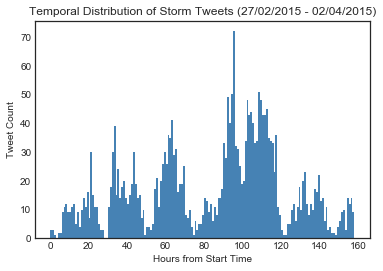

In [13]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
plt.title('Temporal Distribution of Storm Tweets (27/02/2015 - 02/04/2015)')
plt.ylabel('Tweet Count')
plt.xlabel('Hours from Start Time')
plt.hist(df.msgdate_h, bins=range(0,df.msgdate_h.max().round().astype('int64')+1,1), color='steelblue',
         edgecolor='none')

Here we can see there are various peaks and troughs. Peaks usually appear in the afternoons and evenings of each day, which is expected as most people will be awake to tweet. It appears that the most active time for storm related tweets was around 100 hours after the start time. This suggests that the storm could have been at its worst at this time and thus was causing more of a stir on social media.

### Principal Component Analysis

In visualisation, “spatialisation” refers to arranging visual objects within the display space in such a way that the distances between them reflect the degree of similarity or relatedness between the data items they represent. Particularly, spatialisation can be a helpful tool in studying joint distributions and interrelations of multiple attributes.

Principal Component Analysis (PCA) is a method for spatalisation. PCA used input vectors composed of values multiple numeric attributes associated with the same element of a container or carrier set. It applies transformations to the original attributes to derive a smaller number of new attributes, called principal components, that capture most of the variability among the vectors. The first principal component has the largest possible variance, and so on. The first two or three principal components can be used as dimensions of a 2D or 3D artificial space.

Essentially, PCA is a way of compressing a lot of data into something that captures the essence of the orginal data.

In [16]:
import os
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA #for PCA algorithm

os.chdir(r'/Users/roryhurley/Desktop/DataScienceProjects/StormTweetAnalysis/Data')
df = pd.read_csv('storm_tweets.csv')
df['msgdate']=pd.to_datetime(df['MESSAGEDATE'], format="%d/%m/%Y %H:%M:%S")
df['msgdate_h']=(pd.to_datetime(df.msgdate)-pd.to_datetime(df.msgdate.min().date())).astype('int64')/1000000000/3600
df.head()

,id,Name,X,Y,LONGITUDE,LATITUDE,MESSAGEDATE,USERSCREENNAME,MESSAGETEXT,LOCATION,HASHTAGS,MESSAGETEXT+HASHTAGS,Features,keyword=storm,keyword=wind,keyword=rain,keyword=snow,keyword=hail,keyword=flood,keyword=road,keyword=collapse,keyword=ingury,keyword=disrupt,keyword=forecast,Mask,bad weather (sum),consequence (sum),bad weather,consequence,msgdate,msgdate_h
0,581338551868063744,storm,0.071042,52.094433,0.071042,52.094433,27/03/2015 06:14:46,Willis12Pat,Love retirement! My day.. The 7's taping the ...,Fowlmere; England,NaN,Love retirement! My day.. The 7's taping the ...,storm,1,0,0,0,0,0,0,0,0,0,0,10000000000,1.0,0.0,1.0,0.0,2015-03-27 06:14:46,6.246111
1,581275225955893249,collapse,-0.210674,51.478096,-0.210674,51.478096,27/03/2015 02:03:08,Daiz11,Fyi if the brightside remix is played in Londo...,Hammersmith; London,NaN,Fyi if the brightside remix is played in Londo...,collapse,0,0,0,0,0,0,0,1,0,0,0,1000,0.0,1.0,0.0,1.0,2015-03-27 02:03:08,2.052222
2,581312068629954560,wind,-3.086356,53.060090,-3.086356,53.060089,27/03/2015 04:29:32,secondhand_shed,@tonywilliams68 @wrexham strong winds sorry ;i...,Minera; Wales,NaN,@tonywilliams68 @wrexham strong winds sorry ;i...,wind,0,1,0,0,0,0,0,0,0,0,0,1000000000,1.0,0.0,1.0,0.0,2015-03-27 04:29:32,4.492222
3,581274239308832769,flood,-1.118795,52.617813,-1.118795,52.617813,27/03/2015 01:59:12,DrJonMillett,@Leicester_Merc New street lamp is like living...,Leicester; England,NaN,@Leicester_Merc New street lamp is like living...,flood,0,0,0,0,0,1,0,0,0,0,0,100000,0.0,1.0,0.0,1.0,2015-03-27 01:59:12,1.986667
4,581330592920444928,flood,-0.651385,51.902275,-0.651385,51.902275,27/03/2015 05:43:08,VirtualJukebox,The Flood by Cheryl Cole is #nowplaying in Any...,East; England,nowplaying,The Flood by Cheryl Cole is #nowplaying in Any...,flood,0,0,0,0,0,1,0,0,0,0,0,100000,0.0,1.0,0.0,1.0,2015-03-27 05:43:08,5.718889


The dataset needs to be reduced, so that only information on the tweet ID, tweet location and keyword information is included.

In [17]:
pd.set_option('display.max_columns', None)
df1 = df[['id','X','Y','keyword=storm','keyword=wind','keyword=rain','keyword=snow','keyword=hail','keyword=flood','keyword=road','keyword=collapse','keyword=ingury','keyword=disrupt','keyword=forecast']]
df1.head()

,id,X,Y,keyword=storm,keyword=wind,keyword=rain,keyword=snow,keyword=hail,keyword=flood,keyword=road,keyword=collapse,keyword=ingury,keyword=disrupt,keyword=forecast
0,581338551868063744,0.071042,52.094433,1,0,0,0,0,0,0,0,0,0,0
1,581275225955893249,-0.210674,51.478096,0,0,0,0,0,0,0,1,0,0,0
2,581312068629954560,-3.086356,53.060090,0,1,0,0,0,0,0,0,0,0,0
3,581274239308832769,-1.118795,52.617813,0,0,0,0,0,1,0,0,0,0,0
4,581330592920444928,-0.651385,51.902275,0,0,0,0,0,1,0,0,0,0,0


The PCA model can now be fitted to the pre-processed dataset, df1, using a user-defined number of components. The PCA components are also shown below.

In [20]:
pca = PCA(n_components=3)
pca.fit(df1)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [21]:
pca.components_

array([[-1.00000000e+00, -1.46254465e-17, -1.08976940e-16,
         1.78297957e-17, -8.05410384e-17,  5.01405361e-17,
        -1.89675023e-17, -3.83980432e-17,  3.38501965e-17,
         4.32190769e-18,  2.00987300e-17,  6.96260009e-18,
        -2.04243698e-17,  1.51552867e-17],
       [-4.73296399e-17, -8.49752967e-01,  5.25722319e-01,
        -5.84454695e-03,  2.82506845e-02,  4.75052442e-03,
         5.15499191e-03,  5.61373526e-03, -4.50061232e-03,
         2.39736459e-02, -3.16305755e-03,  5.11826228e-04,
        -4.12475399e-03,  8.66939634e-04],
       [ 1.03908641e-16, -5.26677779e-01, -8.44637643e-01,
         2.12420137e-02, -6.54330700e-02, -3.28674560e-02,
        -7.86767047e-03, -7.55501204e-03,  1.41515544e-02,
        -4.71248359e-02,  5.21156569e-03,  6.43643118e-04,
         1.41114180e-02, -2.48613629e-02]])

Let's refine the dataframe further so that only the keywords were used for analysis.

In [23]:
df2 = df[['keyword=storm','keyword=wind','keyword=rain','keyword=snow','keyword=hail','keyword=flood','keyword=road','keyword=collapse','keyword=ingury','keyword=disrupt','keyword=forecast']]
df2.head()

,keyword=storm,keyword=wind,keyword=rain,keyword=snow,keyword=hail,keyword=flood,keyword=road,keyword=collapse,keyword=ingury,keyword=disrupt,keyword=forecast
0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0


In [24]:
pca2 = PCA(n_components=3)
pca2.fit(df2)
df2pca = pca2.transform(df2)

In [25]:
df2pca

array([[-0.62753438,  0.09032522, -0.05608116],
       [ 0.17785612, -0.51691268, -0.02097192],
       [ 0.73266398,  0.26053637, -0.27526815],
       ...,
       [ 0.19565362, -0.57717564, -0.03970129],
       [-0.62753438,  0.09032522, -0.05608116],
       [ 0.17785612, -0.51691268, -0.02097192]])

In [26]:
df2pca.shape

(2620, 3)

The PCA output of df2 can be visualised in a 2D visualisation space, below.

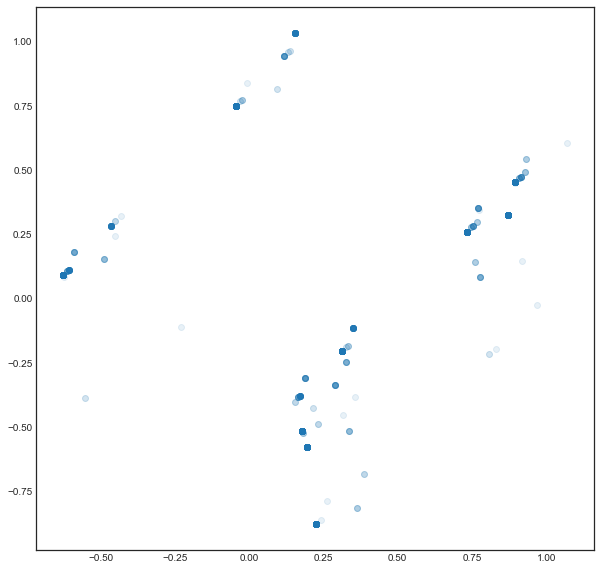

In [27]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(10, 10))
plt.scatter(df2pca[:,0], df2pca[:,1], alpha=0.1)
plt.show()

Again, the dataset can be altered. This time, two columns are included to assess whether the tweet is about the 'bad weather', or a consequence of the storm.

In [28]:
df3 = df[['bad weather','consequence','keyword=storm','keyword=wind','keyword=rain','keyword=snow','keyword=hail','keyword=flood','keyword=road','keyword=collapse','keyword=ingury','keyword=disrupt','keyword=forecast']]
df3.head()

,bad weather,consequence,keyword=storm,keyword=wind,keyword=rain,keyword=snow,keyword=hail,keyword=flood,keyword=road,keyword=collapse,keyword=ingury,keyword=disrupt,keyword=forecast
0,1.0,0.0,1,0,0,0,0,0,0,0,0,0,0
1,0.0,1.0,0,0,0,0,0,0,0,1,0,0,0
2,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0
3,0.0,1.0,0,0,0,0,0,1,0,0,0,0,0
4,0.0,1.0,0,0,0,0,0,1,0,0,0,0,0


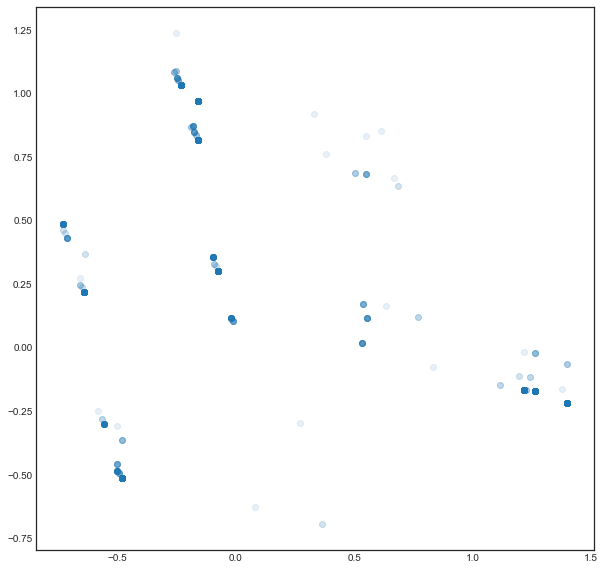

In [29]:
pca3 = PCA(n_components=3)
pca3.fit(df3)
df3pca = pca3.transform(df3)
plt.figure(figsize=(10, 10))
plt.scatter(df3pca[:,0], df3pca[:,1], alpha=0.1)
plt.show()

PCA outputs can also be visualised in a 3-dimensional space to further aid understanding.

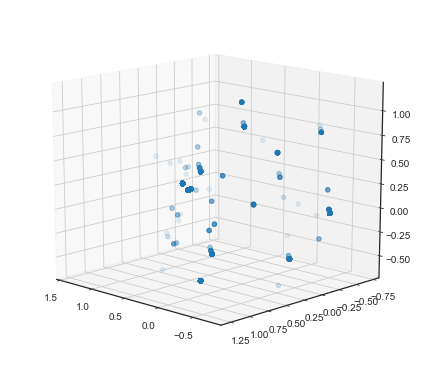

In [30]:
df3 = df[['bad weather','consequence','keyword=storm','keyword=wind','keyword=rain','keyword=snow','keyword=hail','keyword=flood','keyword=road','keyword=collapse','keyword=ingury','keyword=disrupt','keyword=forecast']]
pca3 = PCA(n_components=3)
pca3.fit(df3)
df3pca = pca3.transform(df3)
fig = plt.figure(1, figsize=(6, 5))
plt.clf()
from mpl_toolkits.mplot3d import Axes3D
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=15, azim=134) # change parameters here for experimenting
ax.scatter(df3pca[:,0], df3pca[:,1], df3pca[:,2], alpha=0.1)
plt.show()

## K-means

The following section details the application of the clustering algorithm k-means; showing cluster centres on the projection plot.
Here, the projection is used in combination with partition-based clustering (k-means) applied to the same attributes as the projection.


In [31]:
df = pd.read_csv('storm_tweets.csv')
pd.set_option('display.max_columns', None)
df

,id,Name,X,Y,LONGITUDE,LATITUDE,MESSAGEDATE,USERSCREENNAME,MESSAGETEXT,LOCATION,HASHTAGS,MESSAGETEXT+HASHTAGS,Features,keyword=storm,keyword=wind,keyword=rain,keyword=snow,keyword=hail,keyword=flood,keyword=road,keyword=collapse,keyword=ingury,keyword=disrupt,keyword=forecast,Mask,bad weather (sum),consequence (sum),bad weather,consequence
0,581338551868063744,storm,0.071042,52.094433,0.071042,52.094433,27/03/2015 06:14:46,Willis12Pat,Love retirement! My day.. The 7's taping the ...,Fowlmere; England,NaN,Love retirement! My day.. The 7's taping the ...,storm,1,0,0,0,0,0,0,0,0,0,0,10000000000,1.0,0.0,1.0,0.0
1,581275225955893249,collapse,-0.210674,51.478096,-0.210674,51.478096,27/03/2015 02:03:08,Daiz11,Fyi if the brightside remix is played in Londo...,Hammersmith; London,NaN,Fyi if the brightside remix is played in Londo...,collapse,0,0,0,0,0,0,0,1,0,0,0,1000,0.0,1.0,0.0,1.0
2,581312068629954560,wind,-3.086356,53.060090,-3.086356,53.060089,27/03/2015 04:29:32,secondhand_shed,@tonywilliams68 @wrexham strong winds sorry ;i...,Minera; Wales,NaN,@tonywilliams68 @wrexham strong winds sorry ;i...,wind,0,1,0,0,0,0,0,0,0,0,0,1000000000,1.0,0.0,1.0,0.0
3,581274239308832769,flood,-1.118795,52.617813,-1.118795,52.617813,27/03/2015 01:59:12,DrJonMillett,@Leicester_Merc New street lamp is like living...,Leicester; England,NaN,@Leicester_Merc New street lamp is like living...,flood,0,0,0,0,0,1,0,0,0,0,0,100000,0.0,1.0,0.0,1.0
4,581330592920444928,flood,-0.651385,51.902275,-0.651385,51.902275,27/03/2015 05:43:08,VirtualJukebox,The Flood by Cheryl Cole is #nowplaying in Any...,East; England,nowplaying,The Flood by Cheryl Cole is #nowplaying in Any...,flood,0,0,0,0,0,1,0,0,0,0,0,100000,0.0,1.0,0.0,1.0
5,581347370438393856,storm,-0.462822,53.219820,-0.462822,53.219818,27/03/2015 06:49:48,CunninghamKian,The calm before the storm ... http://t.co/7Pv5...,Washingborough; England,NaN,The calm before the storm ... http://t.co/7Pv5...,storm,1,0,0,0,0,0,0,0,0,0,0,10000000000,1.0,0.0,1.0,0.0
6,581328032511709184,collapse;forecast,-1.537833,53.387165,-1.537833,53.387165,27/03/2015 05:32:58,deffmick,@SkyNews Something fishy here ! Usually; tall...,Yorkshire and The Humber; England,NaN,@SkyNews Something fishy here ! Usually; tall...,collapse;forecast,0,0,0,0,0,0,0,1,0,0,1,1001,0.0,1.0,0.0,1.0
7,581268046955806720,storm,-1.584887,52.778570,-1.584887,52.778568,27/03/2015 01:34:36,_katiegreen__,stormzy / mievado,Swadlincote; England,NaN,stormzy / mievado;,storm,1,0,0,0,0,0,0,0,0,0,0,10000000000,1.0,0.0,1.0,0.0
8,581346808099684352,disrupt,0.012129,50.870740,0.012129,50.870739,27/03/2015 06:47:34,philhillslewes,@NRE_Southern @brightonstation what about disr...,Lewes; England,NaN,@NRE_Southern @brightonstation what about disr...,disrupt,0,0,0,0,0,0,0,0,0,1,0,10,0.0,1.0,0.0,1.0
9,581270572723634176,forecast,0.252533,51.511170,0.252533,51.511169,27/03/2015 01:44:38,TheMockneyRebel,Guardian/ICM survey puts Labour in line to gai...,Aveley; England,NaN,Guardian/ICM survey puts Labour in line to gai...,forecast,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0


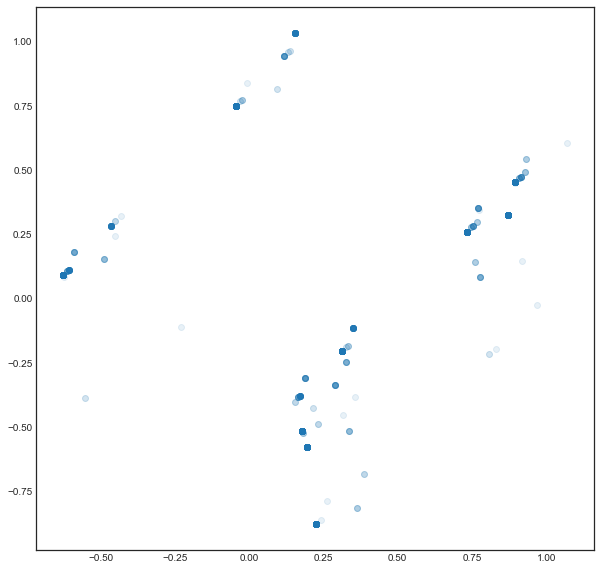

In [32]:
df1 = df[['keyword=storm','keyword=wind','keyword=rain','keyword=snow','keyword=hail','keyword=flood','keyword=road','keyword=collapse','keyword=ingury','keyword=disrupt','keyword=forecast']]
pca1 = PCA(n_components=4)
pca1.fit(df1)
df1pca = pca1.transform(df1)
plt.figure(figsize=(10, 10))
plt.scatter(df1pca[:,0], df1pca[:,1], alpha=0.1)
plt.show()

Some clear clusters of tweets can be observed in the above graph. The K-means clustering algorithm can now be applied to the PCA output to attempt to quantitatively group the tweets.

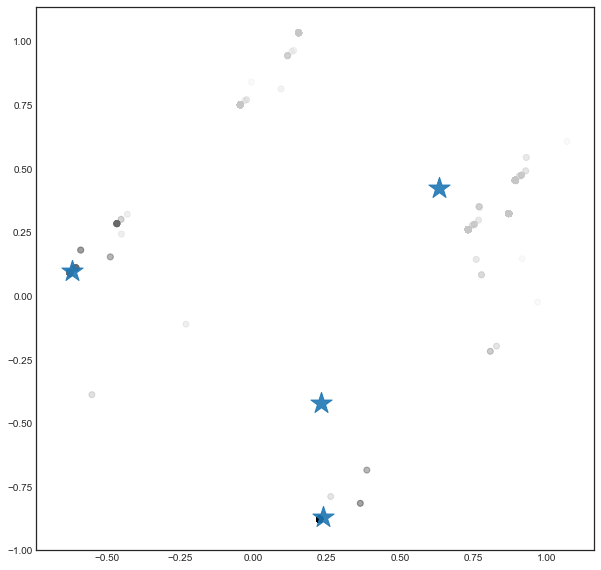

In [36]:
# Number of clusters
kmeans = KMeans(n_clusters=4) # this parameter can be changed
# fit the model to the data
kmeans = kmeans.fit(df1)
# obtain cluster labels
labels = kmeans.predict(df1)
# get the centroid values
centroids = kmeans.cluster_centers_
cpca = pca1.transform(centroids)
plt.figure(figsize=(10, 10))
plt.scatter(df1pca[:,0], df1pca[:,1], alpha=0.1, c=labels)
plt.scatter(cpca[:,0], cpca[:,1], marker='*', alpha=0.9, s=500)
plt.show()

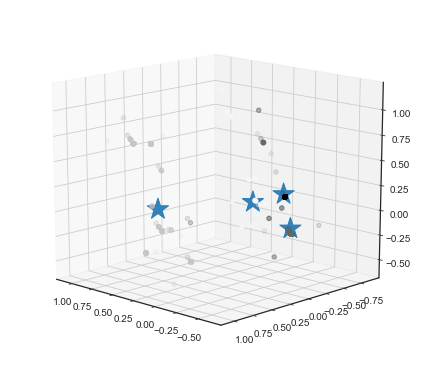

In [37]:
pca3 = PCA(n_components=4)
pca3.fit(df1)
df3pca = pca3.transform(df1)
cpca = pca3.transform(centroids)
fig = plt.figure(1, figsize=(6, 5))
#plt.clf()
from mpl_toolkits.mplot3d import Axes3D
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=15, azim=134)
ax.scatter(df3pca[:,0], df3pca[:,1], df3pca[:,2], alpha=0.1, c=labels)
plt.scatter(cpca[:,0], cpca[:,1], marker='*', alpha=0.9, s=500)
plt.show()

## Map

In order to acheive a good overview of how tweets are spatially distributed, it would be a good idea to display the locations of the tweets on a map.

In [38]:
import folium #for spatail visualisation
import os
import pandas as pd
import numpy as np

In [39]:
os.chdir(r'/Users/roryhurley/Desktop/DataScienceProjects/StormTweetAnalysis/Data')
df = pd.read_csv('storm_tweets.csv')
pd.set_option('display.max_columns', None)
df.head()

,id,Name,X,Y,LONGITUDE,LATITUDE,MESSAGEDATE,USERSCREENNAME,MESSAGETEXT,LOCATION,HASHTAGS,MESSAGETEXT+HASHTAGS,Features,keyword=storm,keyword=wind,keyword=rain,keyword=snow,keyword=hail,keyword=flood,keyword=road,keyword=collapse,keyword=ingury,keyword=disrupt,keyword=forecast,Mask,bad weather (sum),consequence (sum),bad weather,consequence
0,581338551868063744,storm,0.071042,52.094433,0.071042,52.094433,27/03/2015 06:14:46,Willis12Pat,Love retirement! My day.. The 7's taping the ...,Fowlmere; England,NaN,Love retirement! My day.. The 7's taping the ...,storm,1,0,0,0,0,0,0,0,0,0,0,10000000000,1.0,0.0,1.0,0.0
1,581275225955893249,collapse,-0.210674,51.478096,-0.210674,51.478096,27/03/2015 02:03:08,Daiz11,Fyi if the brightside remix is played in Londo...,Hammersmith; London,NaN,Fyi if the brightside remix is played in Londo...,collapse,0,0,0,0,0,0,0,1,0,0,0,1000,0.0,1.0,0.0,1.0
2,581312068629954560,wind,-3.086356,53.060090,-3.086356,53.060089,27/03/2015 04:29:32,secondhand_shed,@tonywilliams68 @wrexham strong winds sorry ;i...,Minera; Wales,NaN,@tonywilliams68 @wrexham strong winds sorry ;i...,wind,0,1,0,0,0,0,0,0,0,0,0,1000000000,1.0,0.0,1.0,0.0
3,581274239308832769,flood,-1.118795,52.617813,-1.118795,52.617813,27/03/2015 01:59:12,DrJonMillett,@Leicester_Merc New street lamp is like living...,Leicester; England,NaN,@Leicester_Merc New street lamp is like living...,flood,0,0,0,0,0,1,0,0,0,0,0,100000,0.0,1.0,0.0,1.0
4,581330592920444928,flood,-0.651385,51.902275,-0.651385,51.902275,27/03/2015 05:43:08,VirtualJukebox,The Flood by Cheryl Cole is #nowplaying in Any...,East; England,nowplaying,The Flood by Cheryl Cole is #nowplaying in Any...,flood,0,0,0,0,0,1,0,0,0,0,0,100000,0.0,1.0,0.0,1.0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 29 columns):
id                      2620 non-null int64
Name                    2620 non-null object
X                       2620 non-null float64
Y                       2620 non-null float64
LONGITUDE               2620 non-null float64
LATITUDE                2620 non-null float64
MESSAGEDATE             2620 non-null object
USERSCREENNAME          2620 non-null object
MESSAGETEXT             2620 non-null object
LOCATION                2618 non-null object
HASHTAGS                866 non-null object
MESSAGETEXT+HASHTAGS    2620 non-null object
Features                2620 non-null object
keyword=storm           2620 non-null int64
keyword=wind            2620 non-null int64
keyword=rain            2620 non-null int64
keyword=snow            2620 non-null int64
keyword=hail            2620 non-null int64
keyword=flood           2620 non-null int64
keyword=road            2620 non-null int6

In [58]:
xmm=(df.X.min()+df.X.max())/2
ymm=(df.Y.min()+df.Y.max())/2
map = folium.Map(location=[ymm,xmm], zoom_start=5, tiles = "stamenterrain")
df.apply(lambda row:folium.CircleMarker(location=[row["Y"], row["X"]], 
                                              radius=1) #fill_color=colors[row['Class']])
                                             .add_to(map), axis=1)
map

The spatial distribution can be better visualised using a heatmap from the folium package.

In [56]:
from folium.plugins import HeatMap
xmm=(df.X.min()+df.X.max())/2
ymm=(df.Y.min()+df.Y.max())/2

heatmap = folium.Map(location=[ymm,xmm], zoom_start=5, tiles = "stamenterrain")
heatmap_wide = HeatMap(list(zip(df.LATITUDE.values, df.LONGITUDE.values)), min_opacity=0.8, radius=10, blur=20, max_zoom=1)
heatmap.add_child(heatmap_wide)

It looks like the storm was a hot topic of conversation in the UK! Interestingly, despite there being clear clusters of tweets around cities, the tweets are distributed well across the whole country.

To observe how spatial distribution of tweets is affected over time, a subset of the data can be mapped. For this purpuse we transform strings to datetime and then query the data.

In [50]:
df['msgdate']=pd.to_datetime(df['MESSAGEDATE'], format="%d/%m/%Y %H:%M:%S")

In [51]:
df.msgdate.min()

Timestamp('2015-03-27 00:05:49')

In [59]:
df.msgdate.max()

Timestamp('2015-04-02 13:40:59')

In [60]:
df['msgdate_h']=(pd.to_datetime(df.msgdate)-pd.to_datetime(df.msgdate.min().date())).astype('int64')/1000000000/3600

Now, we can add a time element to our map! The code below plots the tweets on a map, with some parameters 'tstart' and 'tend' to select a subset of tweets from x hours after the storm start time to x hours after the end. 

We can now refer to the histogram earlier to observe spatial distribution of tweets at different stages of the storm!

In [68]:
xmm=(df.X.min()+df.X.max())/2
ymm=(df.Y.min()+df.Y.max())/2
map = folium.Map(location=[ymm,xmm], zoom_start=5, tiles = "Stamen Terrain")
tstart=80 # change query conditions here for experimenting ***
tend=120   # change query conditions here for experimenting ***
df[(df['msgdate_h']>=tstart) & (df['msgdate_h']<=tend)].apply(
    lambda row:folium.CircleMarker(location=[row["Y"], row["X"]], radius=2).add_to(map), axis=1)
map

### Conclusion

So from this project, we have seen how twitter data can be used to explore spatio temporal phenomena, and visualised to give an informed view of these patterns.

One goal for future work would be to embed an interactive slider to adjust the tstart and tend parameters to allow more dynamic querying.